In [17]:
import pandas as pd
import numpy as np
from astropy.constants import u as m_p
from astropy import units as u
from astropy.constants import c,h,k_B, R_sun, L_sun,R_jup, R_earth, sigma_sb, G,M_earth, m_p, sigma_T, M_sun

import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

Question 3

In [18]:
#Define given gamma values
gamma_1 = 1
gamma_2 = 2
gamma_5 = 5
gamma_10 = 10

In [19]:
# velocity defined from rearanging the equaition for gamma
v = np.sqrt(c**2 * (1-gamma_1**(-2)))

In [20]:
#define an array of theta values
theta = np.arange(0.01,4*np.pi,np.pi/100)

In [21]:
#Assume that the given constant is equal to 1
#The parallel component angular power distributions in the observed frame K (given in problem)
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
p_par

<Quantity [9.99966667e-05, 1.71429847e-03, 5.29510629e-03, 1.08282883e-02,
           1.82920076e-02, 2.76568083e-02, 3.88857317e-02, 5.19344625e-02,
           6.67515033e-02, 8.32783780e-02, 1.01449862e-01, 1.21194242e-01,
           1.42433595e-01, 1.65084100e-01, 1.89056364e-01, 2.14255781e-01,
           2.40582900e-01, 2.67933819e-01, 2.96200598e-01, 3.25271680e-01,
           3.55032335e-01, 3.85365110e-01, 4.16150298e-01, 4.47266402e-01,
           4.78590621e-01, 5.09999333e-01, 5.41368583e-01, 5.72574569e-01,
           6.03494137e-01, 6.34005261e-01, 6.63987528e-01, 6.93322610e-01,
           7.21894737e-01, 7.49591146e-01, 7.76302533e-01, 8.01923480e-01,
           8.26352873e-01, 8.49494301e-01, 8.71256434e-01, 8.91553388e-01,
           9.10305059e-01, 9.27437444e-01, 9.42882928e-01, 9.56580556e-01,
           9.68476269e-01, 9.78523120e-01, 9.86681459e-01, 9.92919088e-01,
           9.97211391e-01, 9.99541428e-01, 9.99900003e-01, 9.98285702e-01,
           9.94704894e-01

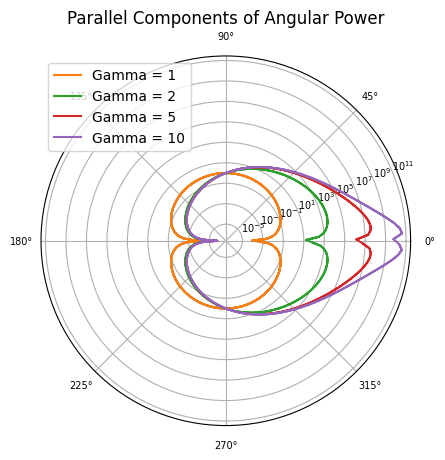

In [22]:
#Plot the parallel components of the angular power distributions

plt.polar(theta,p_par)           #create plot in polar coordinates

v = np.sqrt(c**2 * (1-gamma_1**(-2)))       #calculate velocity for given value of gamma
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6 #plug in the velocity to solve for parallel components using given value of gamma
plt.polar(theta,p_par, label = 'Gamma = 1')

v = np.sqrt(c**2 * (1-gamma_2**(-2)))       #repeat for other gamma values
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
plt.polar(theta,p_par, label = 'Gamma = 2')

v = np.sqrt(c**2 * (1-gamma_5**(-2)))
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
plt.polar(theta,p_par, label = 'Gamma = 5')

v = np.sqrt(c**2 * (1-gamma_10**(-2)))
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
plt.polar(theta,p_par, label = 'Gamma = 10')

plt.yscale('log')        #plot using a logarithmic scale so all gamma values fit on one plot
plt.legend(loc='upper left')
plt.title('Parallel Components of Angular Power')
plt.tick_params(labelsize=7)

In [23]:
#redefine theta array
theta = np.arange(0.0,5*np.pi,np.pi/15000)

#Define the perpendicular component angular power distributions in the observed frame K (given in problem)
# the constant A=1 as above
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2))/((gamma_1**2 * (1-(v/c)*np.cos(theta))**2)))
p_perp

<Quantity [1.58402000e+09, 1.58122709e+09, 1.57284922e+09, ...,
           6.31305346e-02, 6.31305243e-02, 6.31305181e-02]>

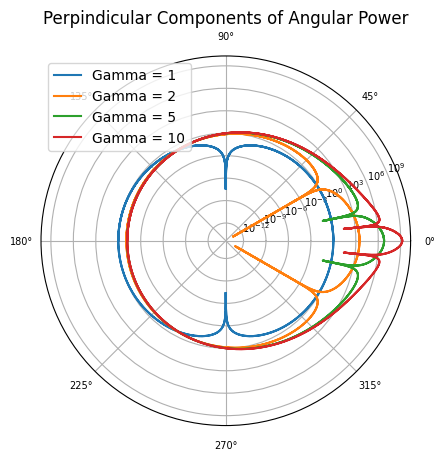

In [24]:
#produce the graph of the perpendicular components of the angular power distributions (as above)
v = np.sqrt(c**2 * (1-gamma_1**(-2)))
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2))/((gamma_1**2 * (1-(v/c)*np.cos(theta))**2)))
plt.polar(theta,p_perp, label = 'Gamma = 1')

v = np.sqrt(c**2 * (1-gamma_2**(-2)))
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2))/((gamma_2**2 * (1-(v/c)*np.cos(theta))**2)))
plt.polar(theta,p_perp, label = 'Gamma = 2')

v = np.sqrt(c**2 * (1-gamma_5**(-2)))
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2))/((gamma_5**2 * (1-(v/c)*np.cos(theta))**2)))
plt.polar(theta,p_perp, label = 'Gamma = 5')

v = np.sqrt(c**2 * (1-gamma_10**(-2)))
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2))/((gamma_10**2 * (1-(v/c)*np.cos(theta))**2)))
plt.polar(theta,p_perp, label = 'Gamma = 10')
plt.yscale('log')
plt.legend(loc='upper left')
plt.title('Perpindicular Components of Angular Power')
plt.tick_params(labelsize=7)

Bonus

For this section, we now need to consider phi and include it in our graphing

In [25]:
#redefine theta array
theta = np.arange(0.0,5*np.pi,np.pi/150)
#define phi array
phi = np.arange(0.0,5*np.pi,np.pi/150)

In [26]:
#Define given gamma values
gamma_1 = 1
gamma_2 = 2
gamma_5 = 5
gamma_10 = 10

gamma = gamma_1

In [29]:
#reevalute velocity,p_par, and p_perp
v = np.sqrt(c**2 * (1-gamma**(-2)))
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2 * np.cos(phi)**2)/((gamma**2 * (1-(v/c)*np.cos(theta))**2))))

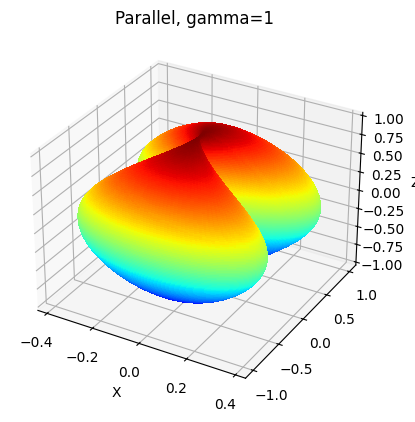

In [30]:
#create 3D spherical plot
THETA, PHI = np.meshgrid(theta, phi)
R = p_par     #radius defined by the corresponding component of angular power

#convert spherical coordinates into carteisan 
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()

#plot the figure
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Parallel, gamma=1')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()

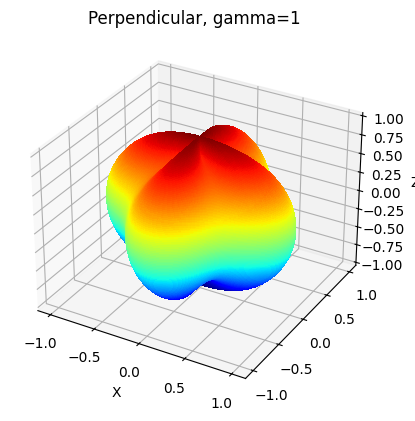

In [31]:
THETA, PHI = np.meshgrid(theta, phi)
R = p_perp
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Perpendicular, gamma=1')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()

In [32]:
#reevalute velocity,p_par, and p_perp for next value of 
gamma= gamma_2
v = np.sqrt(c**2 * (1-gamma**(-2)))
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2 * np.cos(phi)**2)/((gamma**2 * (1-(v/c)*np.cos(theta))**2))))

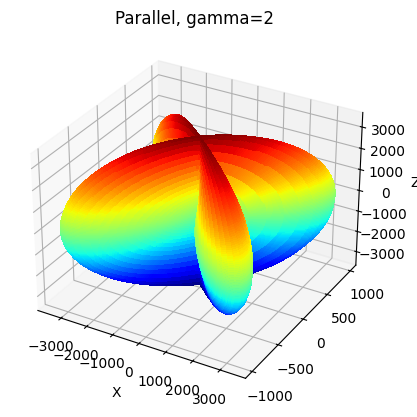

In [33]:
THETA, PHI = np.meshgrid(theta, phi)
R = p_par
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Parallel, gamma=2')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()

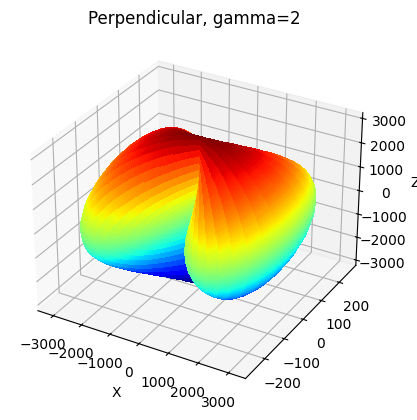

In [34]:
THETA, PHI = np.meshgrid(theta, phi)
R = p_perp
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Perpendicular, gamma=2')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()

In [35]:
gamma= gamma_5
v = np.sqrt(c**2 * (1-gamma**(-2)))
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2 * np.cos(phi)**2)/((gamma**2 * (1-(v/c)*np.cos(theta))**2))))

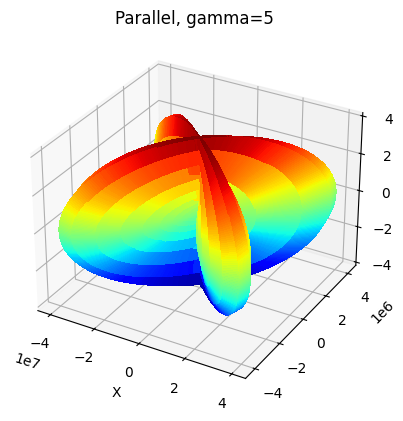

In [36]:
THETA, PHI = np.meshgrid(theta, phi)
R = p_par
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Parallel, gamma=5')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()

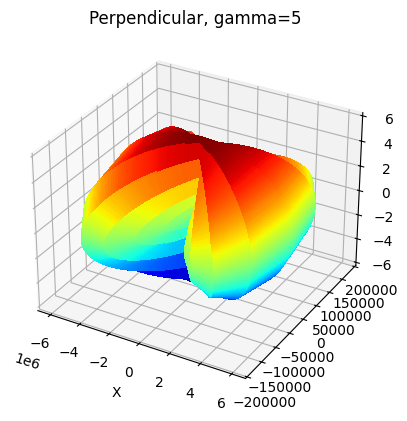

In [37]:
THETA, PHI = np.meshgrid(theta, phi)
R = p_perp
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Perpendicular, gamma=5')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()

In [38]:
gamma= gamma_10
v = np.sqrt(c**2 * (1-gamma**(-2)))
p_par = ((np.sin(theta))**2)/(1-(v/c)*np.cos(theta))**6
p_perp = (1)/(1-(v/c)*np.cos(theta))**4 * (1- ((np.sin(theta)**2 * np.cos(phi)**2)/((gamma**2 * (1-(v/c)*np.cos(theta))**2))))

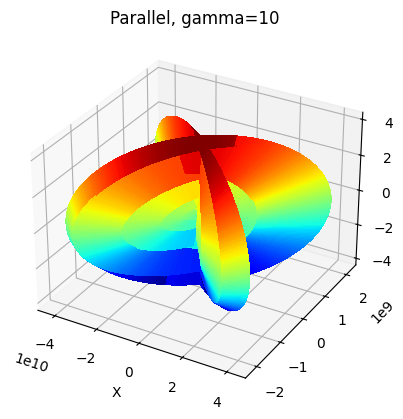

In [39]:
THETA, PHI = np.meshgrid(theta, phi)
R = p_par
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Parallel, gamma=10')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()

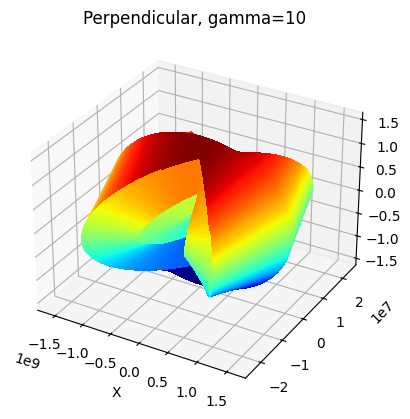

In [40]:
THETA, PHI = np.meshgrid(theta, phi)
R = p_perp
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title('Perpendicular, gamma=10')
ax.set_xlabel('X')
ax.set_label('Y')
ax.set_zlabel('Z')
plt.show()